# Capstone Project Machine Learning

## Project: Human Activity Recognizer and Tracker 

### Project Overview :


The average office worker sits about 10 hours a day. There are all those hours in front of the computer, going through emails, making calls or writing proposals and eating lunch. And then there is hours sitting in front of the TV or surfing the web at home. Medical researchers have long warned that prolonged sitting is dangerous, associated with a significantly higher risk of heart disease, diabetes, obesity, cancer and depression, as well as muscle and joint problems. 

**The aim of this project is to build a use case that take sensor information from our mobile phones and use that information to recognized and classify human activity like sitting running etc. and to analyse that information which could be used to give further notifications, suggestions and recommendations**

**Research Paper - ** 1. http://ieeexplore.ieee.org/document/5581050/  	2. http://www.sciencedirect.com/science/article/pii/S1877050914008643/



### Import Datasets
**Source:https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones**

In the code cell below, we import a dataset of sensor signals (accelerometer and gyroscope), pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

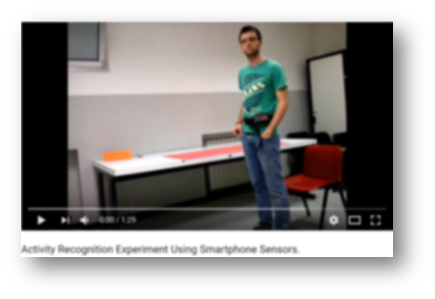

**DataSet Description -**

* Triaxial acceleration from the accelerometer (total acceleration).
* Triaxial Angular velocity from the gyroscope.
* A 561-feature vector with time and frequency domain variables.
* Its activity label.
* An identifier of the subject who carried out the experiment


We populate a few variables:
- `train_data`- Shuffled train dataset
- `test_data` - Shuffled test dataset 




In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

%matplotlib inline

import visuals as vs


#load shuffled train dataset
train_data = shuffle(pd.read_csv("./data/train.csv"))

#load shuffled testing dataset
test_data = shuffle(pd.read_csv("./data/test.csv"))

#sample dataset
display(train_data.head())

#shape of train and test datasets
print(train_data.shape)
print(test_data.shape)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2992,0.212615,-0.001846,-0.107604,-0.385214,-0.265255,-0.206170,-0.389646,-0.316245,-0.231377,-0.315858,...,-0.421231,0.744280,-0.067254,-0.821251,0.526779,-0.650395,0.236735,0.221563,16,WALKING
6197,0.395994,-0.035844,-0.147805,0.032051,-0.001079,-0.206525,-0.034004,-0.045274,-0.271372,0.473836,...,-0.248952,-0.771328,0.913341,0.953724,-0.037674,-0.767922,0.199528,0.146967,27,WALKING_DOWNSTAIRS
3121,0.281048,-0.019459,-0.113922,-0.997122,-0.993560,-0.988608,-0.997453,-0.993340,-0.989181,-0.941440,...,-0.825191,-0.140221,-0.029824,-0.492761,0.463879,-0.852804,0.137161,-0.081064,16,SITTING
3637,0.275515,-0.022522,-0.110302,-0.997823,-0.988799,-0.987885,-0.998228,-0.987763,-0.988196,-0.943886,...,-0.940576,-0.040249,0.127028,-0.829066,-0.731920,-0.720142,0.271737,-0.069294,19,STANDING
7017,0.281011,-0.017595,-0.118464,-0.995813,-0.974551,-0.981072,-0.996074,-0.977006,-0.983331,-0.940371,...,-0.741054,0.018947,0.012571,-0.471479,0.947860,-0.763478,0.129509,-0.150371,30,SITTING


(7352, 563)
(2947, 563)


####  Data Set contains - 

* 563 feature columns
* 7352 records of training data
* 2947 records of testing data

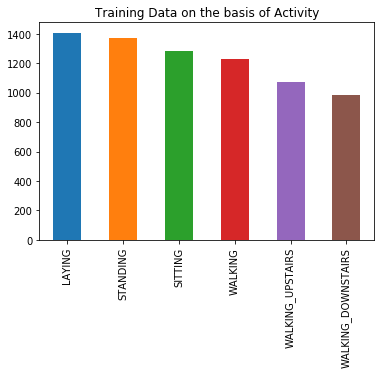

In [2]:
train_data['Activity'].value_counts().plot(kind='bar', title='Training Data on the basis of Activity');

**Take Away** - It depicts the distribution of the data. For a good model, the dataset should be in regular fashion. Here we can infer that records related to laying is maximum, approximately matching to standing, then we have sitting, then  walking ,then walking upstairs and then the least number of records for walking downstairs

** Data distribution on the basis of Activity Type -**

* Laying - more than 1250 records
* Standing - somewhere between number of Laying records and 1250 records.
* Sitting - near 1250 records.
* Walking - Below 1250 records.
* Walking_Upstairs - Around 1000 records
* Walking_Upstairs - Below 1000 records

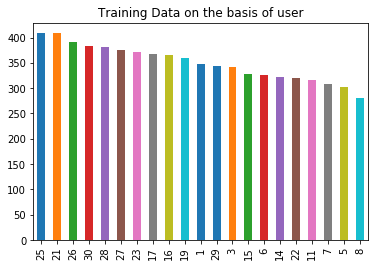

In [3]:
train_data['subject'].value_counts().plot(kind='bar', title='Training Data on the basis of user')

**Take Away** – As we visualize in in the visuals explained above [records distribution based on activity type] on the same way we need regular records distribution among the users who are taking this experiment so that records should not be biased to one user, it should be uniform. Here we observe that records are  somehow uniform.

** Data distribution on the basis of Activity Type **

We populate a few variables:
- `training_labels`- Activity Label Data for train data
- `testing_labels` - Activity Label Data for test data
- `subject_train_data`- Subject who carried out the experiment for training dataset
- `subject_test_data` - Subject who carried out the experiment for testing dataset


** Finally now its the time to clean our dataset- **
   
   So first we will drop the extra columns
   
- `train_data`- Training Dataset with Subject and Activity columns popped out.
- `test_data` - Testing Dataset with Subject and Activity columns popped out.


In [4]:
# Label Data
training_labels = train_data['Activity']
testing_labels = test_data['Activity']


# Data for the subject [Who carried the observations]
subject_train_data = train_data['subject']
subject_test_data = test_data['subject']


#Drop Subject and Acivity from data
train_data = train_data.drop(['subject', 'Activity'], axis=1)
test_data = test_data.drop(['subject', 'Activity'], axis=1)

** Finally now its the time to clean our dataset- **
   
   One Hot encoded Label Datset 
   
- `training_labels_oneHot`- One Hot encoded Training Labels.
- `testing_labels_oneHot` - One Hot encoded Testing Labels.


In [5]:
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical



#Label Encoded format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"])
training_labels_LE = le.transform(training_labels)
testing_labels_LE = le.transform(testing_labels)

# One Hot Encoded format
training_labels_C = to_categorical(training_labels_LE)
test_labels__C = to_categorical(testing_labels_LE)


Using TensorFlow backend.


#### Algorithms and Techniques:

* To solve this problem we would be working out with several Machine Learning algorithms and techniques.

* We will evaluate each model and the model which gives us the maximum efficiency based on evaluation model we would choose it and optimize it much more.

* We will be considering –


    *  Decision Tree Classifier
    *  Random Forest Classifier
    *  Gaussian Naive Bayes Classifier
    *  K Neighbour Classifier
    *  Support Vector Machine
    *  Multilayer Neural Network
    
* So to get to the answer, we plan to start with a couple of algorithms and see which algorithm gives better result. 

* Once we get the algorithm which is best suited for the problem statement we would work to make it more refine and accurate.

* But before initiating with it! We would always be inclined to use a simple model as much as possible under similar accuracy.

** We initially trained the model on each of classifier except neural networks. **

**Metrics**

•	Accuracy - Classification accuracy is the number of correct predictions made as a ratio of all predictions made

•	Precision - precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances

•	F1_score - considers both the precision and the recall of the test to compute the score 

•	Recall – recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances


**Why these metrics?** - We took Accuracy, Precision, F1 Score and Recall as metrics for evaluating our model because accuracy would give an estimate of correct activity prediction to all the activity predictions we made so far. Precision would give us an estimate about the positive human activity predicted value i.e. how much our model is giving relevant result. F1 Score gives a clubbed estimate of precision and recall. Recall would provide us the relevant positive activity prediction to the false negative and true positive human activity recognition results.


In [6]:
from sklearn import metrics


def predictAndEvaluate(clf,training_features,training_labels,testing_features,testing_labels):
    
    clf.fit(training_features,training_labels)
    prediction = clf.predict(testing_features)
    
    
    print(clf.__class__.__name__)
    print(metrics.classification_report(testing_labels, prediction))


** On comparing results we found out - **

* And we observe Random Forest Classifier, K Neighbours, Extra Trees Classifier and other classifiers doesn’t show much good results on testing datasets.

* We can observe that algorithms shows different characteristics when testing and training datasets is concerned, which depicts there algorithms are over fitting.

* We can observe SVM [Support Vector Machine] shows good accuracy score when test data is concerned.

* So we will be opting for SVM as the selected model and we will compare this model for final face off with the Neural Network and we would select the model with better results.



In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB



dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
sv = svm.SVC() 
gb = GaussianNB()


In [8]:
predictAndEvaluate(rf,train_data,training_labels_LE,test_data,testing_labels_LE)
predictAndEvaluate(kn,train_data,training_labels_LE,test_data,testing_labels_LE)
predictAndEvaluate(dt,train_data,training_labels_LE,test_data,testing_labels_LE)
predictAndEvaluate(sv,train_data,training_labels_LE,test_data,testing_labels_LE)
predictAndEvaluate(gb,train_data,training_labels_LE,test_data,testing_labels_LE)


RandomForestClassifier
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.87      0.90      0.88       491
          2       0.91      0.88      0.89       532
          3       0.83      0.97      0.90       496
          4       0.95      0.85      0.90       420
          5       0.89      0.82      0.86       471

avg / total       0.91      0.91      0.91      2947

KNeighborsClassifier
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       537
          1       0.91      0.79      0.85       491
          2       0.83      0.93      0.88       532
          3       0.85      0.98      0.91       496
          4       0.94      0.79      0.86       420
          5       0.90      0.89      0.89       471

avg / total       0.90      0.90      0.90      2947

DecisionTreeClassifier
             precision    recall  f1-score   support

          0       1.00   

** AS SVM showed best results !! So we will find out the accuracy score of SVM **

In [9]:
def CalculateAccuracy(clf,training_features,training_labels,testing_features,testing_labels):
    
    clf.fit(training_features,training_labels)
    prediction = clf.predict(testing_features)
    
    
    print("{} attains Accuracy Score of {}".format(clf.__class__.__name__,metrics.accuracy_score(testing_labels,prediction)))

In [10]:
CalculateAccuracy(sv,train_data,training_labels_LE,test_data,testing_labels_LE)

SVC attains Accuracy Score of 0.9402782490668476


**We would be using KERAS for implementing Neural Network with the following architecture**
* Sequential Model.
* 6 Dense layers.
* Dropout layers to avoid overtraining.
* Relu activation function.
* At last softmax function.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train_data.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(72, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(36, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(output_dim = 6, activation = 'softmax'))


c:\users\sarthak\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`
  from ipykernel import kernelapp as app


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 96)                53952     
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                6984      
_________________________________________________________________
dropout_2 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                2628      
_________________________________________________________________
dropout_3 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                888       
__________

** Now we will compile and fit the model on training dataset. -**
* Optimizer as  Adam
* Metrics as Accuracy 
* Loss as Categorical_crossentropy
- `Epoch`- 21
- `Batch Size`- 50
- `Validation Split`- .15 
- `Shuffle`- True

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

results = model.fit(train_data.values, training_labels_C, nb_epoch = 21 , batch_size = 50, verbose = 2,validation_split = .15, shuffle=True)


c:\users\sarthak\anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 6249 samples, validate on 1103 samples
Epoch 1/21
 - 1s - loss: 1.5367 - acc: 0.2935 - val_loss: 1.0932 - val_acc: 0.5694
Epoch 2/21
 - 0s - loss: 0.9891 - acc: 0.5281 - val_loss: 0.6422 - val_acc: 0.7815
Epoch 3/21
 - 0s - loss: 0.6579 - acc: 0.6952 - val_loss: 0.3663 - val_acc: 0.8395
Epoch 4/21
 - 0s - loss: 0.4997 - acc: 0.7616 - val_loss: 0.3221 - val_acc: 0.8232
Epoch 5/21
 - 0s - loss: 0.4398 - acc: 0.7852 - val_loss: 0.3250 - val_acc: 0.8277
Epoch 6/21
 - 0s - loss: 0.4116 - acc: 0.7931 - val_loss: 0.2848 - val_acc: 0.8296
Epoch 7/21
 - 1s - loss: 0.3729 - acc: 0.8160 - val_loss: 0.2713 - val_acc: 0.8631
Epoch 8/21
 - 0s - loss: 0.3458 - acc: 0.8366 - val_loss: 0.2613 - val_acc: 0.8957
Epoch 9/21
 - 0s - loss: 0.3265 - acc: 0.8505 - val_loss: 0.2024 - val_acc: 0.9429
Epoch 10/21
 - 0s - loss: 0.3196 - acc: 0.8541 - val_loss: 0.2031 - val_acc: 0.9402
Epoch 11/21
 - 0s - loss: 0.3031 - acc: 0.8608 - val_loss: 0.1791 - val_acc: 0.9483
Epoch 12/21
 - 0s - loss: 0.2974 - ac

In [14]:
Neural_score = model.evaluate(test_data.values, test_labels__C, verbose=2)
print("Neural Network - accuracy {} ".format(Neural_score[1]))

Neural Network - accuracy 0.9402782490668476 


**Neural Network attains an accuracy of 94.12 percent.**
**SVM attains an accuracy score of 94.02 percent.**

So both shows approximately similar results. So we can take either of techniques.

#### For knowledge considerations lets find out the accuracy score that we might have achieved if we have selected model other than SVM.


In [15]:
CalculateAccuracy(rf,train_data,training_labels_LE,test_data,testing_labels_LE)
CalculateAccuracy(kn,train_data,training_labels_LE,test_data,testing_labels_LE)
CalculateAccuracy(dt,train_data,training_labels_LE,test_data,testing_labels_LE)
CalculateAccuracy(sv,train_data,training_labels_LE,test_data,testing_labels_LE)
CalculateAccuracy(gb,train_data,training_labels_LE,test_data,testing_labels_LE)

RandomForestClassifier attains Accuracy Score of 0.9090600610790635
KNeighborsClassifier attains Accuracy Score of 0.9002375296912114
DecisionTreeClassifier attains Accuracy Score of 0.8585001696640652
SVC attains Accuracy Score of 0.9402782490668476
GaussianNB attains Accuracy Score of 0.7702748557855447


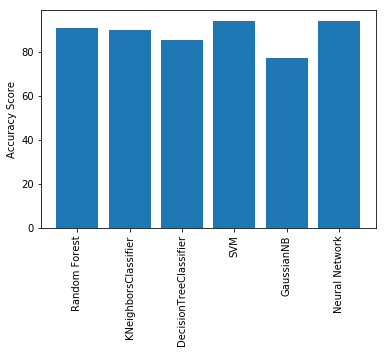

In [16]:

accuracy_Scores_algo = {'Random Forest':90.8,'KNeighborsClassifier':90.02,'DecisionTreeClassifier':85.5,'SVM':94.02,'Random Forest':90.8,'GaussianNB':77.02,'Neural Network':94.12}
plt.bar(range(len(accuracy_Scores_algo)), accuracy_Scores_algo.values(), align='center')
plt.xticks(range(len(accuracy_Scores_algo)), list(accuracy_Scores_algo.keys()))

plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.show()


**Support Vector Machine [Validation]**

These beautiful insights give us a validated outcome that the choosen model - SVM is the eligible model for our problem domain. It's giving Precision Macro Mean Score -  0.94811323831, Recall Macro Mean Score 0.947051984049 and R2 Score -  0.977392570478; which are good scores and supports our decision while selecting SVM as the final model.


In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(sv, train_data,training_labels_LE, scoring=scoring,cv=5, return_train_score=False)
print('Precision Macro Mean Score - ',np.mean(scores['test_precision_macro']))
print('Recall Macro Mean Score',np.mean(scores['test_recall_macro']))

Precision Macro Mean Score -  0.947195302024
Recall Macro Mean Score 0.946005252785


In [20]:
from sklearn.cross_validation import cross_val_predict
model = sv
predictions = cross_val_predict(model, train_data,training_labels_LE, cv=5)
accuracy = metrics.r2_score(training_labels_LE, predictions)
print('R2 Score - ',accuracy)

R2 Score -  0.976440678709


In [28]:
#########################Tuning Hyper Parameter with Accuracy Metrics[Test Data]#############################################
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
score = 'accuracy'
print("Tuning Hyper Parameter with Accuracy Metrics")
clf = GridSearchCV(model, tuned_parameters, cv=5, scoring=score)
clf.fit(train_data,training_labels_LE)
print("Report:")
y_true, y_pred = testing_labels_LE, clf.predict(test_data)
print(classification_report(y_true, y_pred))
#########################Tuning Hyper Parameter with Accuracy Metrics[Test Data]#############################################

Tuning Hyper Parameter with Accuracy Metrics
Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.97      0.89      0.93       491
          2       0.91      0.98      0.94       532
          3       0.96      0.99      0.98       496
          4       0.99      0.97      0.98       420
          5       0.97      0.96      0.97       471

avg / total       0.97      0.97      0.97      2947



In [30]:
prediction = clf.predict(test_data)
    
print(metrics.accuracy_score(y_true,prediction))

0.965727858839


### Justificaton:

* Till now highest accuracy claimed is around 96% posted by Amit Patney on Kaggle discussion page.
* We attained accuracy more than 94 %. Close!
* We reached very close to the accuracy till date.  
* As a final model both SVM and Neural Network attained similar accuracy approx. so we can use any model as a solution to the problem statement.


### Improvement:

* Improvement that I think; could be there by using  Long Short Term Memory network [LSTM] a recurrent neural network on the data to learn and to recognize the type of activity that the user is doing. Many to one RNN architecture taking series of input vectors and output vectors with probabilities to help in classification as one of the 6 classes. LSTM could give good results, as it is well-suited to classify, process and predict time series use cases where, state change with time .

* This project could be converted into an Android or IOS app and the result could be used for giving insights, feedback, suggestions, recommendations etc.
